<a href="https://colab.research.google.com/github/ChristianSantos2671/Computer-Vision-Project-Overview/blob/main/Copy_of_YOLOv8_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a href="https://ultralytics.com/yolov8" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [हिन्दी](https://docs.ultralytics.com/hi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov8"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

Welcome to the Ultralytics YOLOv8 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLOv8</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. This notebook serves as the starting point for exploring the various resources available to help you get started with YOLOv8 and understand its features and capabilities.

YOLOv8 models are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from CPUs to GPUs.

We hope that the resources in this notebook will help you get the most out of YOLOv8. Please browse the YOLOv8 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

In [ ]:
#%cd "/content/drive/MyDrive/Colab Notebooks"
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [31]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.220  Python-3.12.2 torch-2.9.0+cpu CPU (AMD Ryzen 5 3600X 6-Core Processor)
Setup complete  (12 CPUs, 15.9 GB RAM, 346.0/931.5 GB disk)


# 1. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLOv8 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [13]:
# Train YOLOv8n for 3 epochs
!yolo detect train model=yolov8n.pt data=datasets/bananas/data.yaml epochs=3 imgsz=640


Ultralytics 8.3.220  Python-3.12.2 torch-2.9.0+cpu CPU (AMD Ryzen 5 3600X 6-Core Processor)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/bananas/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

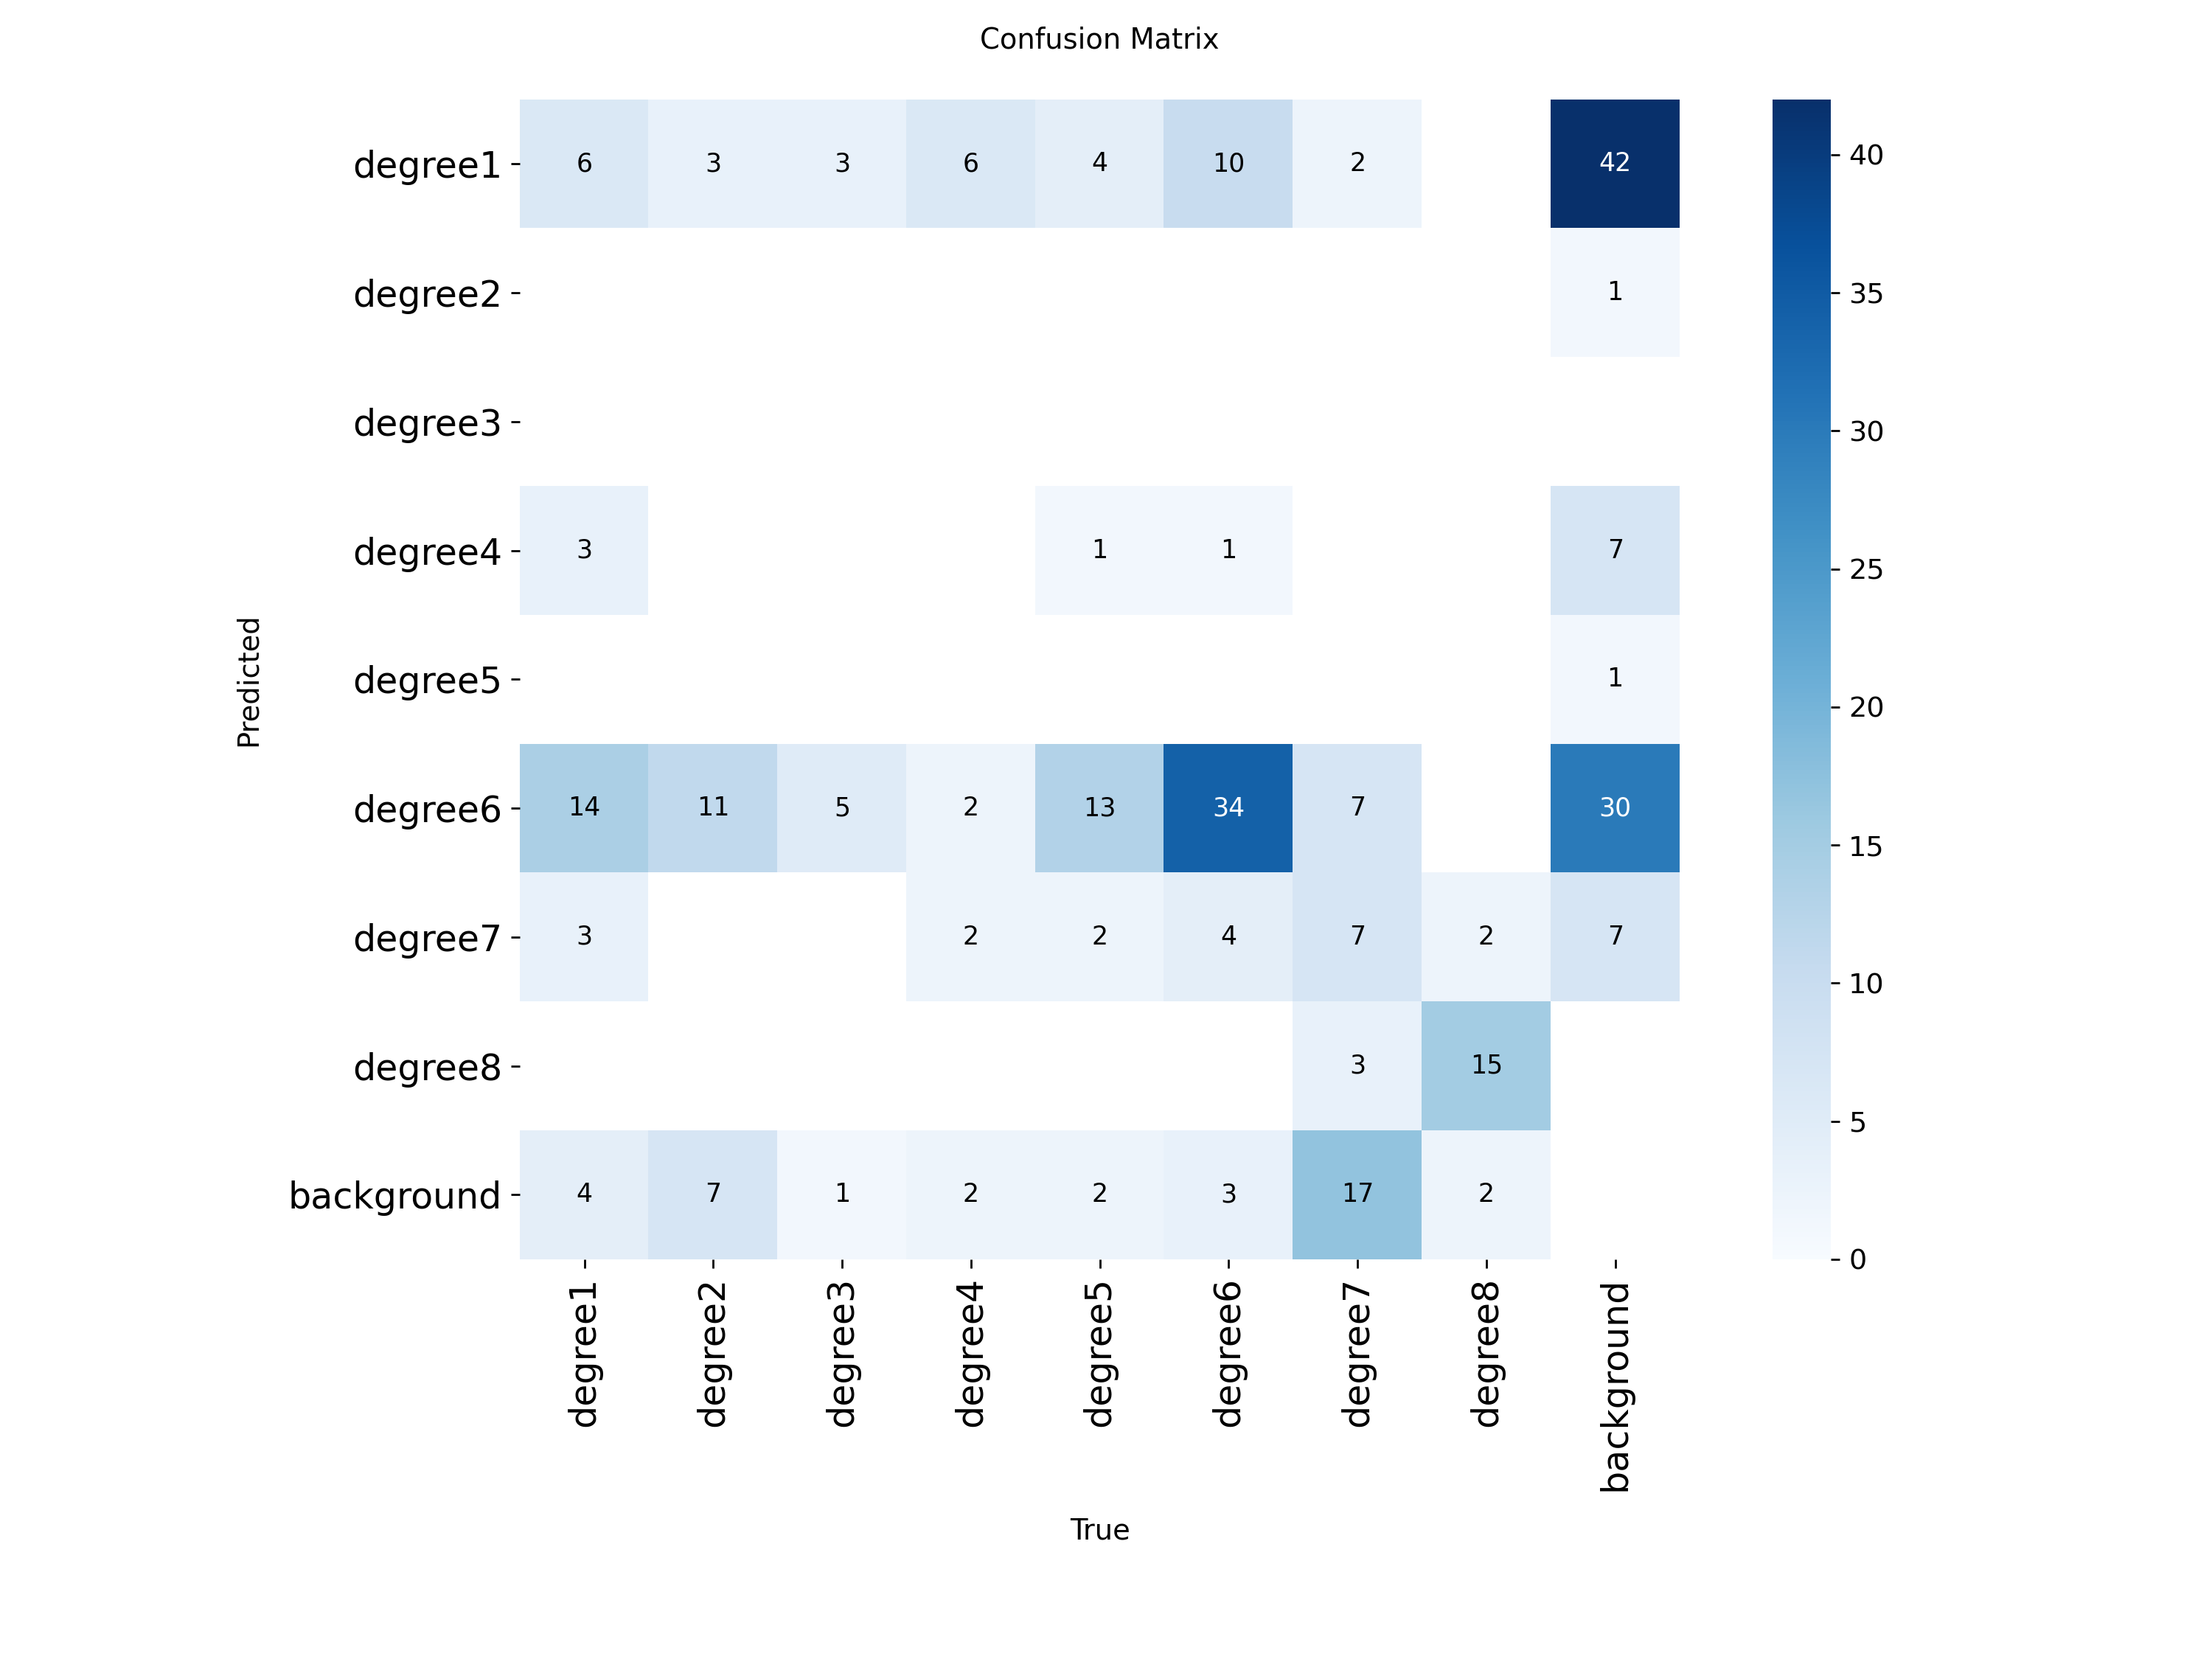

In [14]:
%matplotlib inline
from PIL import Image

Image.open('runs/detect/train/confusion_matrix.png')

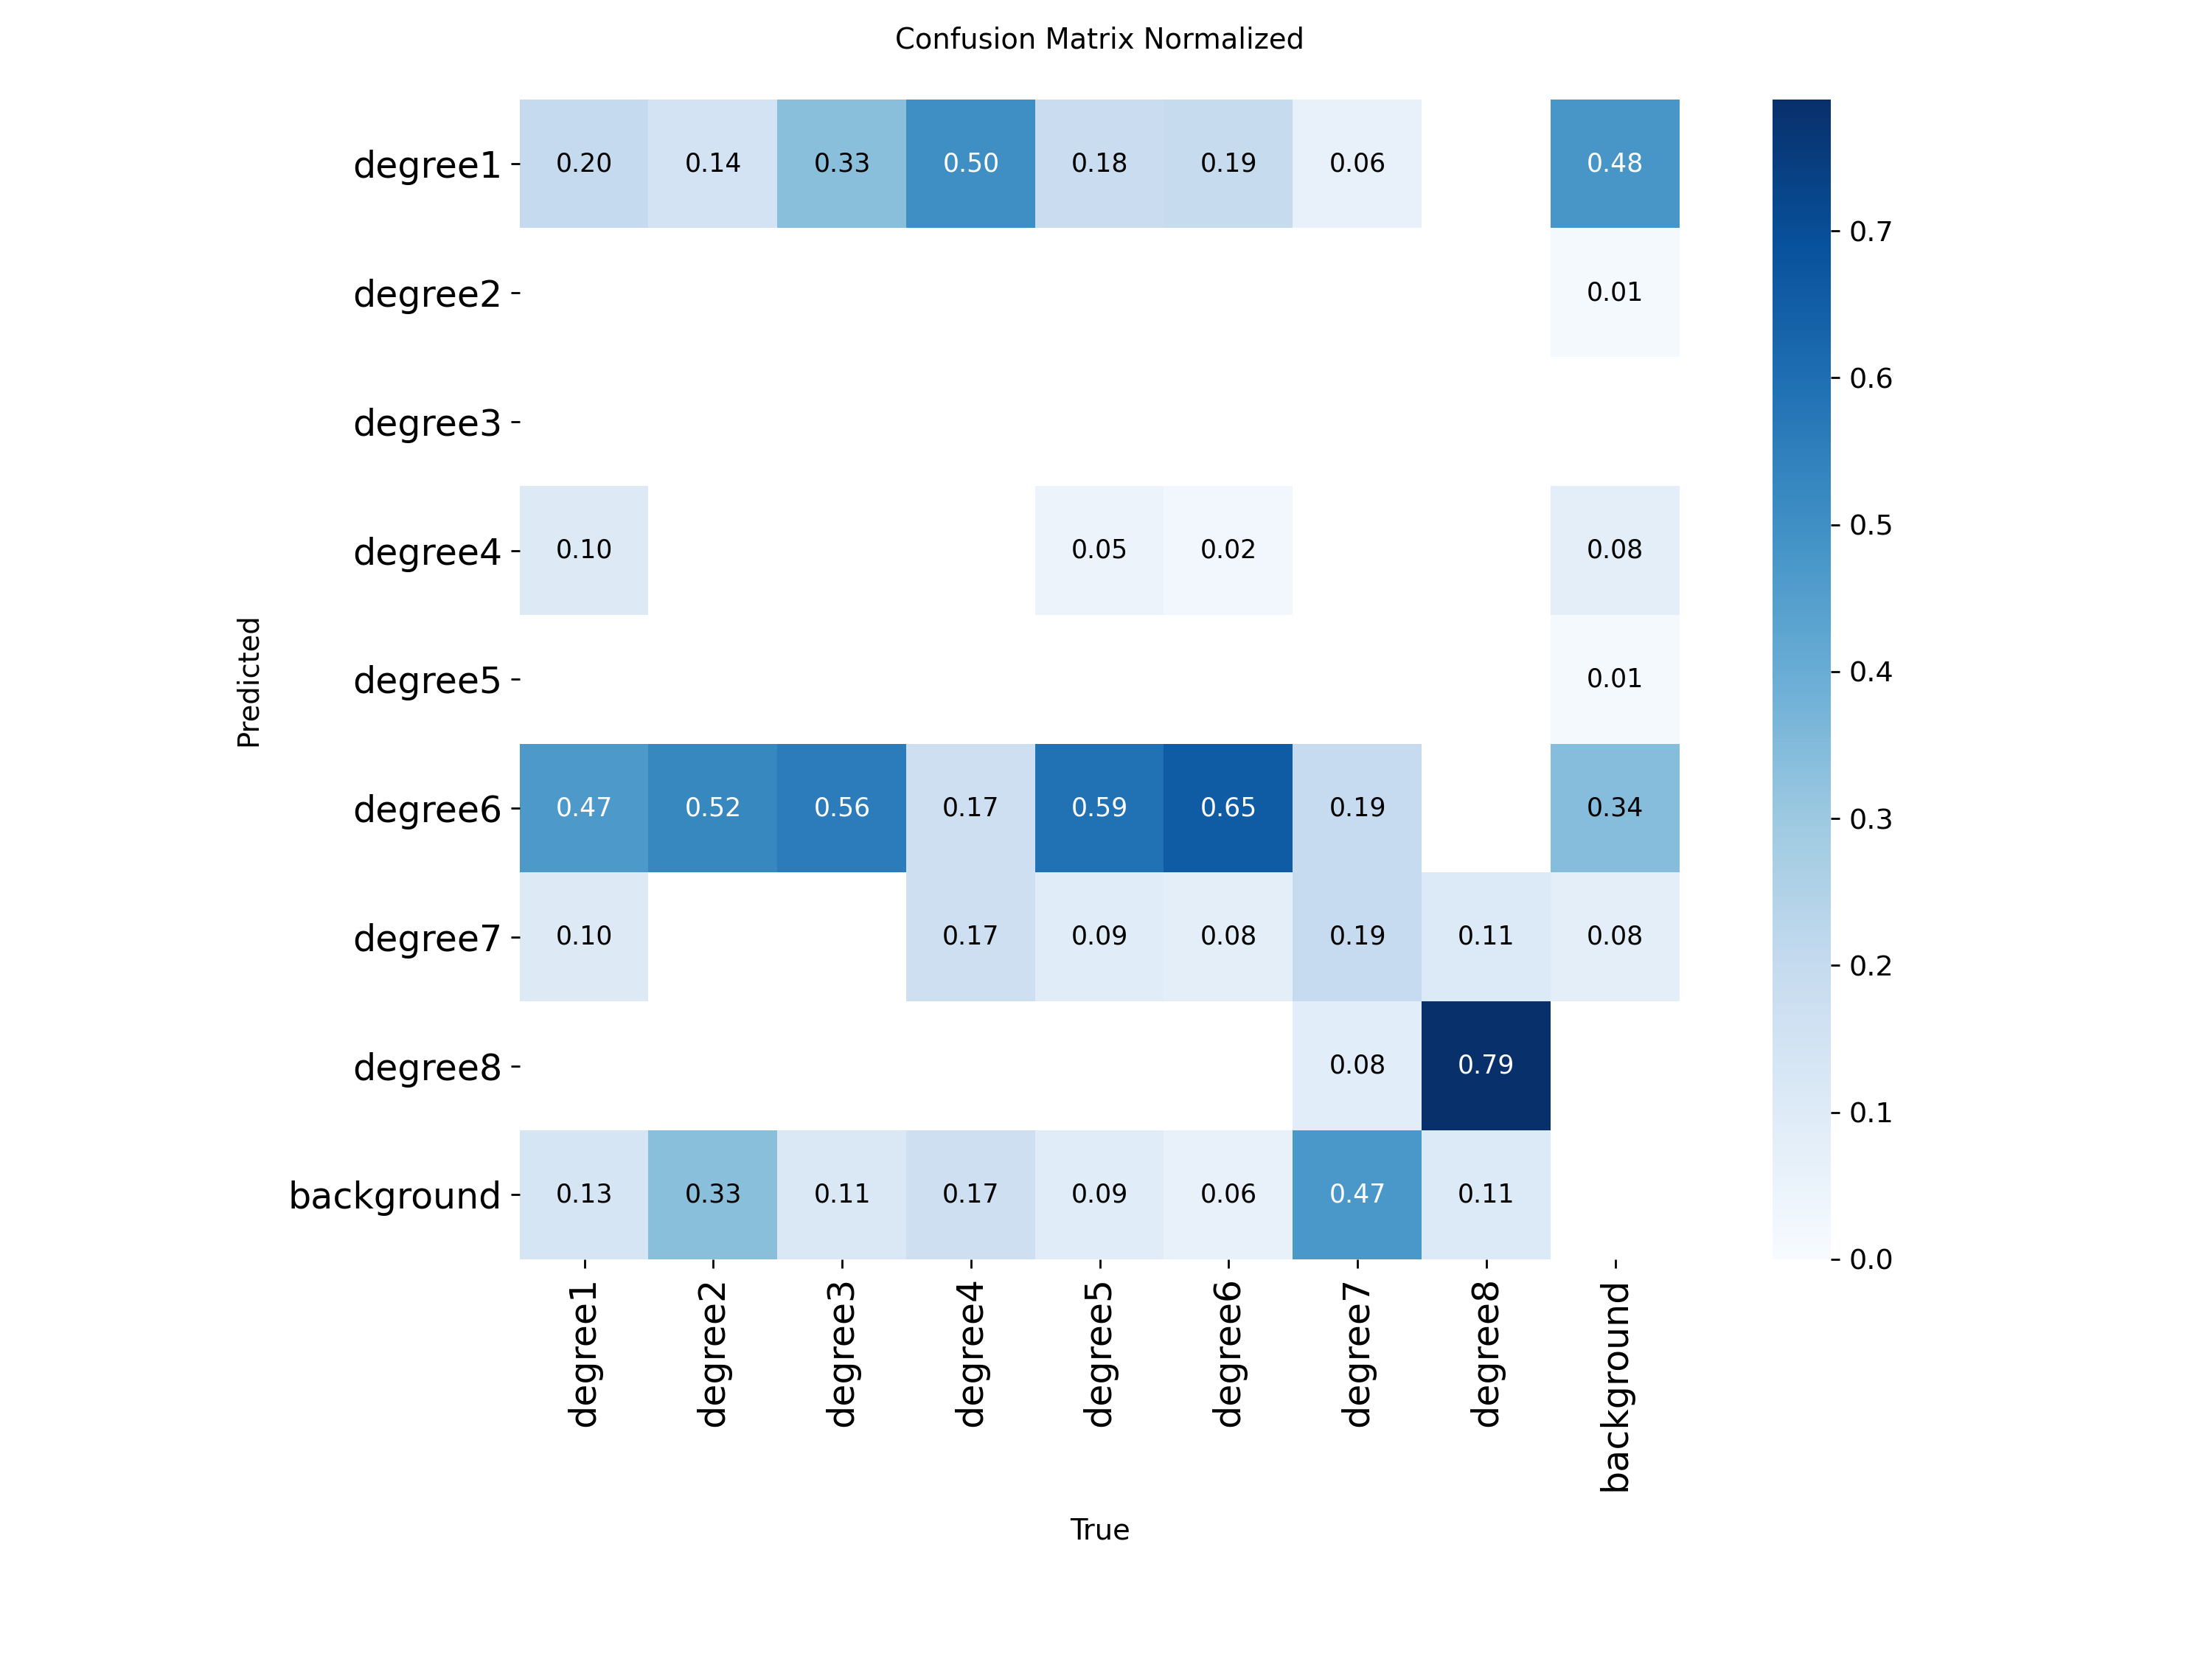

In [15]:
%matplotlib inline
from PIL import Image

Image.open('runs/detect/train/confusion_matrix_normalized.png')

# 2. Val
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits. The latest YOLOv8 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLOv8 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [16]:
# Validate YOLOv8n on val files
!yolo detect val model=runs/detect/train/weights/best.pt data=datasets/bananas/data.yaml

Ultralytics 8.3.220  Python-3.12.2 torch-2.9.0+cpu CPU (AMD Ryzen 5 3600X 6-Core Processor)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 396.998.5 MB/s, size: 55.7 KB)

val: Scanning D:\Users\2003c\Documents\SFU\IAT 360\Projects\ComputerVision\datasets\bananas\labels\val.cache... 200 images, 0 backgrounds, 0 corrupt: 100% â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 200/200  0.0s
val: Scanning D:\Users\2003c\Documents\SFU\IAT 360\Projects\ComputerVision\datasets\bananas\labels\val.cache... 200 images, 0 backgrounds, 0 corrupt: 100% â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 200/200  0.0s
WARNING Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 201. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.

                 Class     Images  Instances      Box(P          R  

# 3. Test

YOLOv8 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLOv8 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">


## 1. Detection

YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. `yolov8n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [17]:
#Test the model on all the test images
!yolo detect val \
    model=runs/detect/train/weights/best.pt \
    data=datasets/bananas/data.yaml \
    split=test \
    project=runs/detect \
    name=test

Ultralytics 8.3.220  Python-3.12.2 torch-2.9.0+cpu CPU (AMD Ryzen 5 3600X 6-Core Processor)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 20.220.8 MB/s, size: 445.1 KB)

val: Scanning D:\Users\2003c\Documents\SFU\IAT 360\Projects\ComputerVision\datasets\bananas\labels\test... 1 images, 0 backgrounds, 0 corrupt: 2% â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€ 1/58 2.3it/s 0.1s<25.0s
val: Scanning D:\Users\2003c\Documents\SFU\IAT 360\Projects\ComputerVision\datasets\bananas\labels\test... 33 images, 0 backgrounds, 0 corrupt: 57% â”�â”�â”�â”�â”�â”�â•¸â”€â”€â”€â”€â”€ 33/58 32.3it/s 0.4s<0.8s
val: Scanning D:\Users\2003c\Documents\SFU\IAT 360\Projects\ComputerVision\datasets\bananas\labels\test... 58 images, 0 backgrounds, 0 corrupt: 100% â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 58/58 130.4it/s 0.4s
val: Scanning D:\Users\2003c\Documents\SFU\IAT 360\Projects\ComputerVision\datasets\bananas\labels\test... 58 images, 0 back

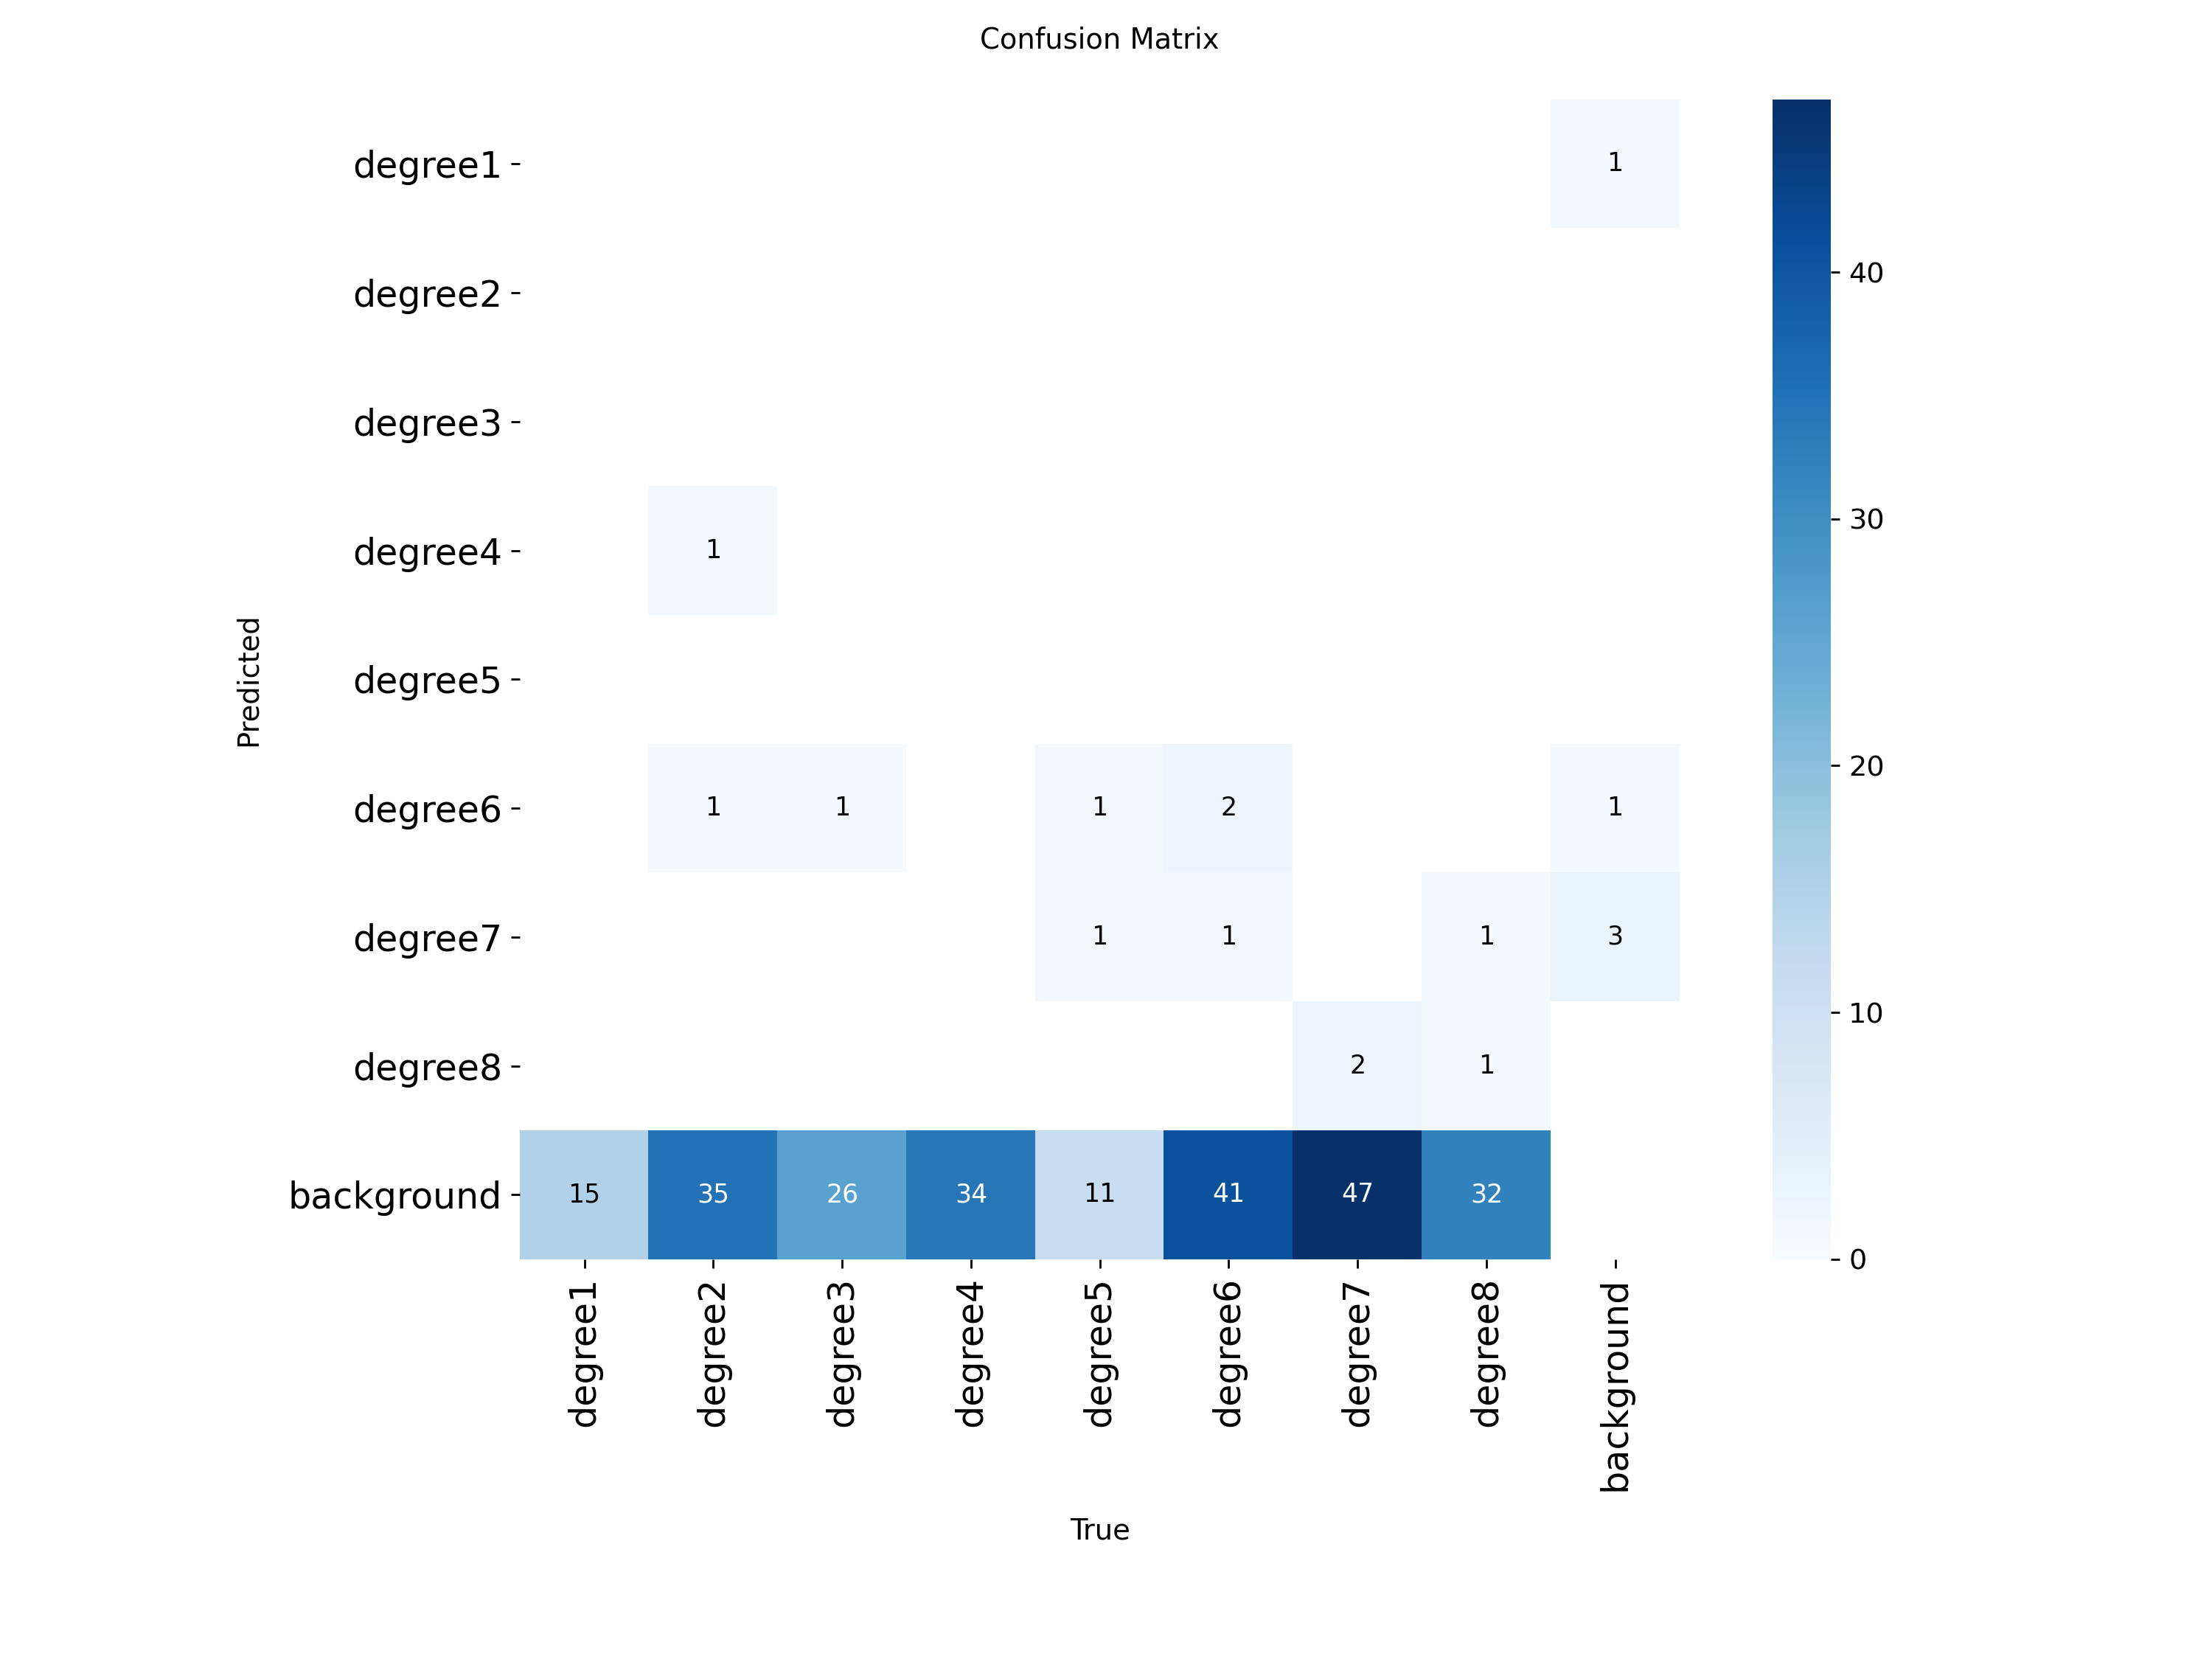

In [18]:
%matplotlib inline
from PIL import Image

Image.open('runs/detect/test/confusion_matrix.png')

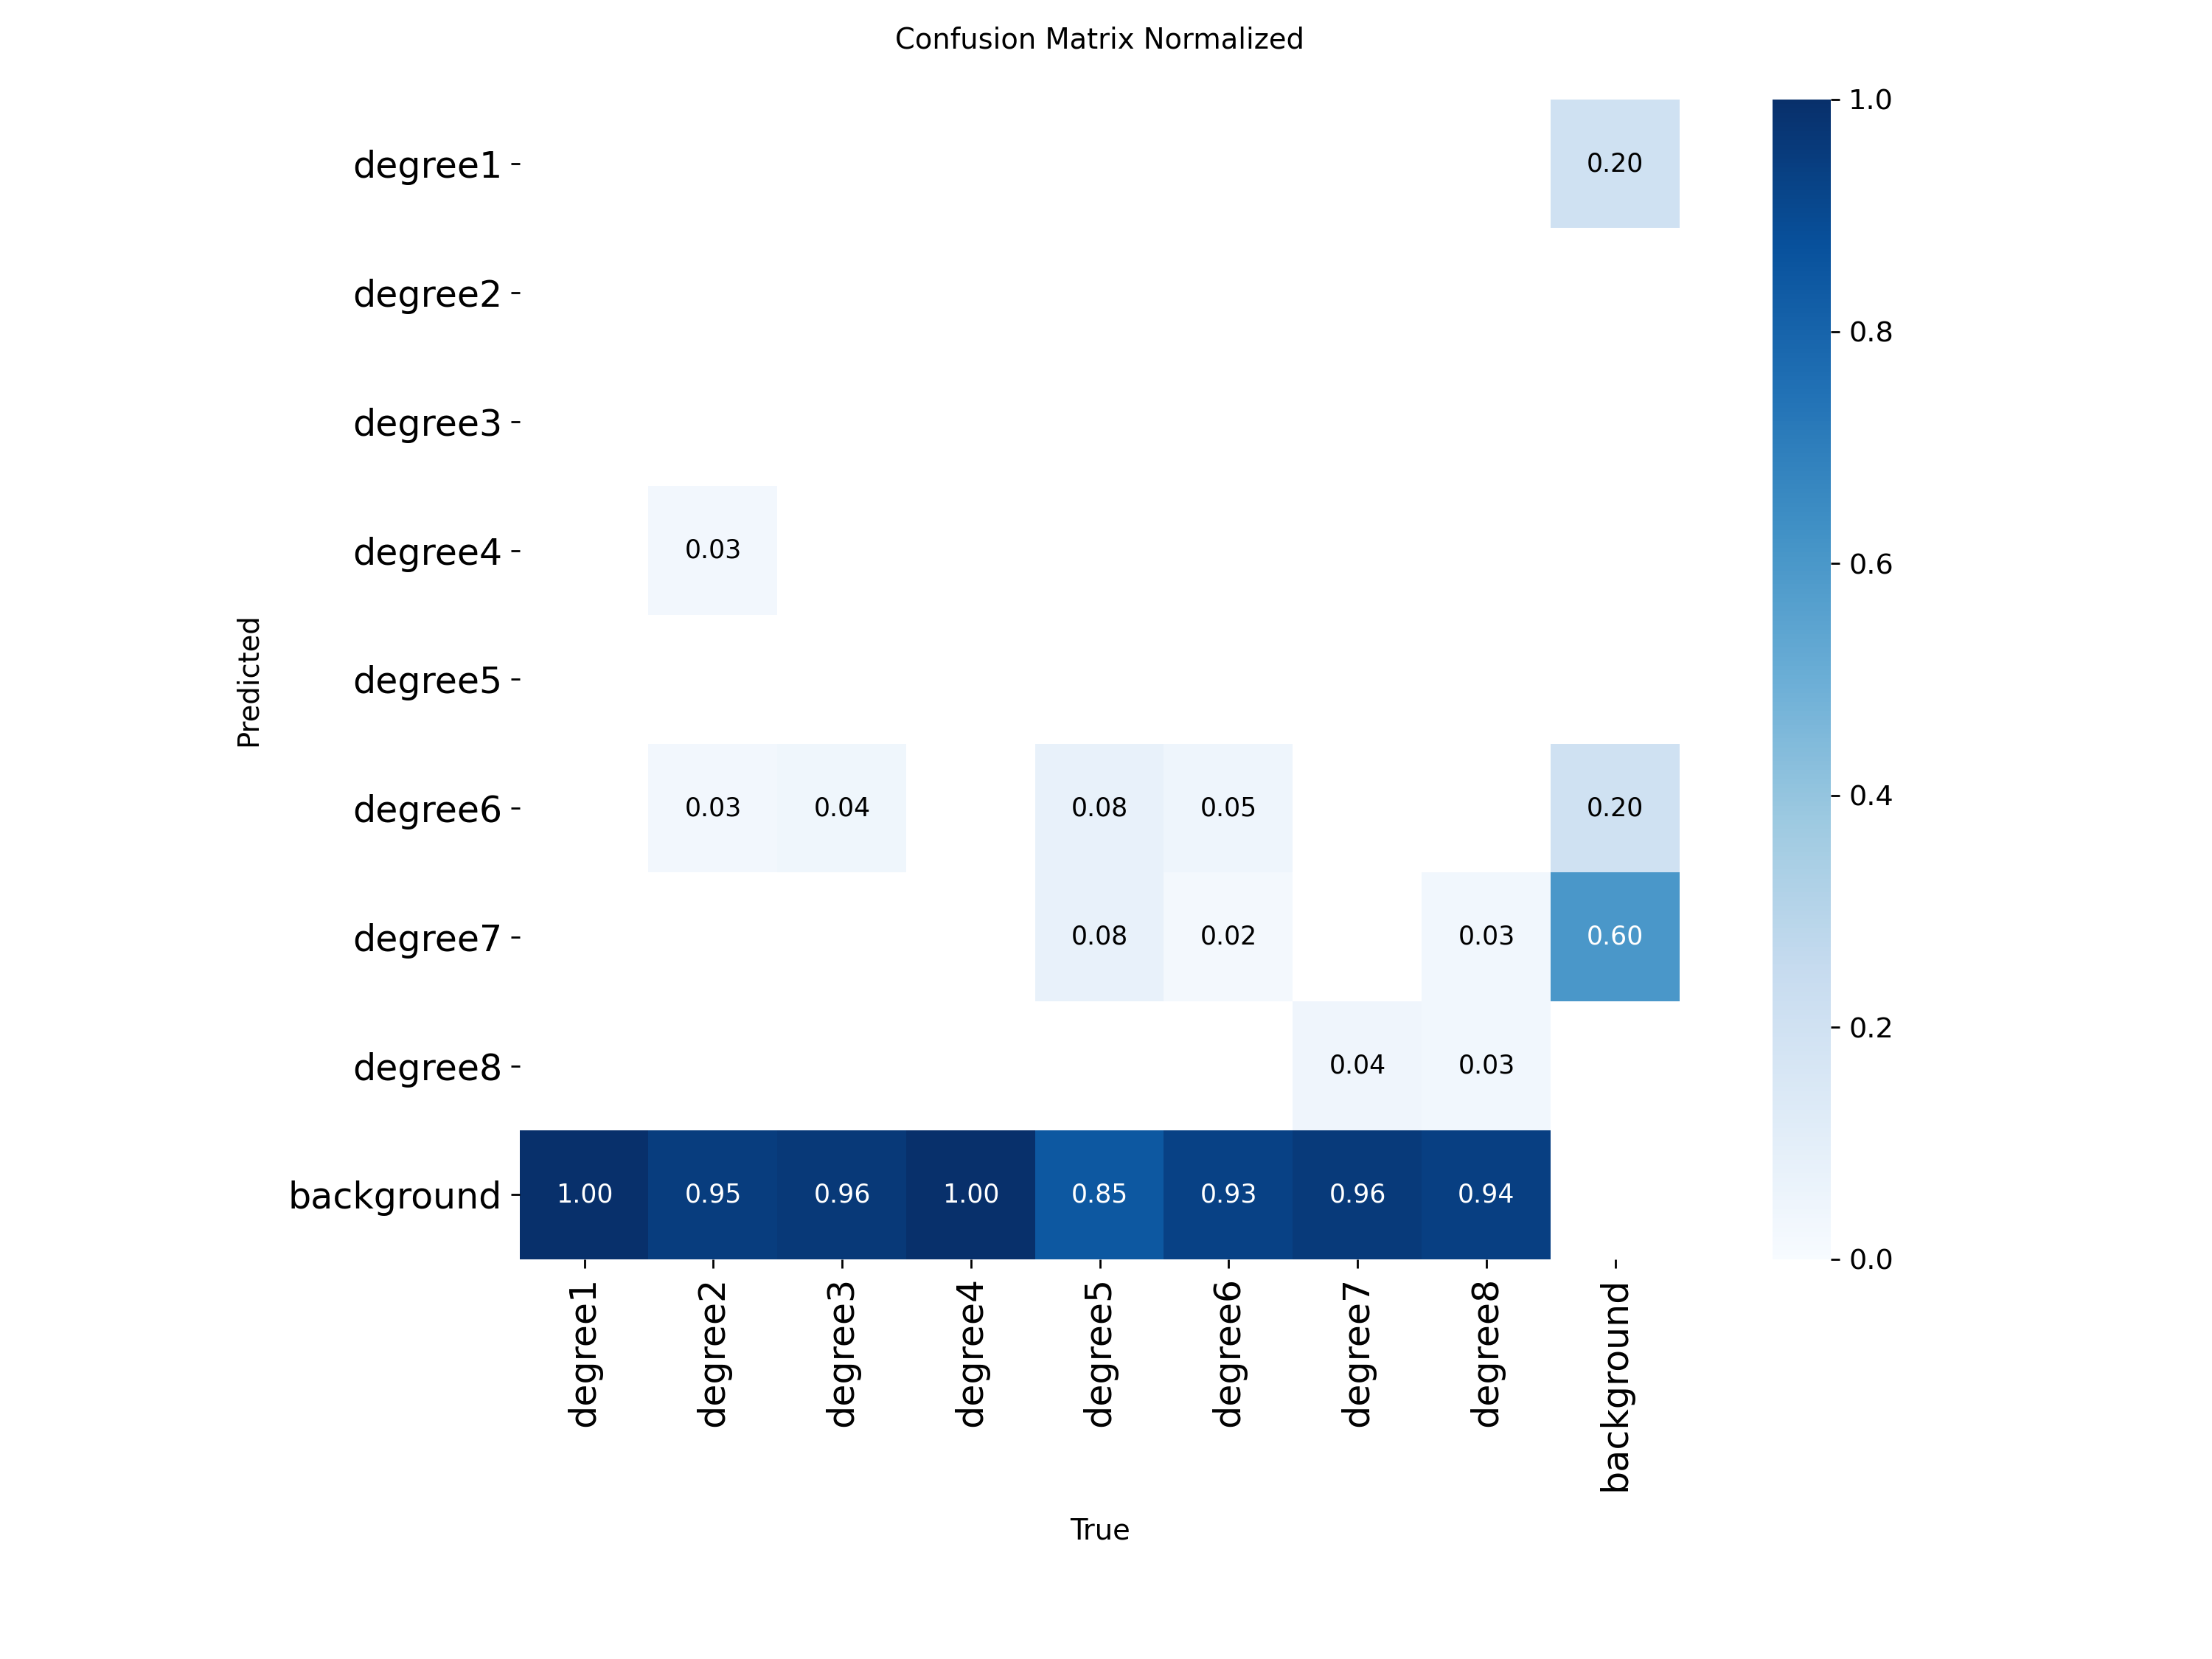

In [20]:
%matplotlib inline
from PIL import Image

Image.open('runs/detect/test/confusion_matrix_normalized.png')

In [25]:
# Predict with the model with an image
!yolo detect predict \
    model=runs/detect/train/weights/best.pt \
    source='datasets/bananas/images/test/0_bananas.webp' \
    conf=0.05 \
    save=True save_txt=True save_conf=True

Ultralytics 8.3.220  Python-3.12.2 torch-2.9.0+cpu CPU (AMD Ryzen 5 3600X 6-Core Processor)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 D:\Users\2003c\Documents\SFU\IAT 360\Projects\ComputerVision\datasets\bananas\images\test\0_bananas.webp: 448x640 2 degree1s, 1 degree6, 1 degree8, 66.4ms
Speed: 2.0ms preprocess, 66.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to D:\Users\2003c\Documents\SFU\IAT 360\Projects\ComputerVision\runs\detect\predict
1 label saved to D:\Users\2003c\Documents\SFU\IAT 360\Projects\ComputerVision\runs\detect\predict\labels
 Learn more at https://docs.ultralytics.com/modes/predict


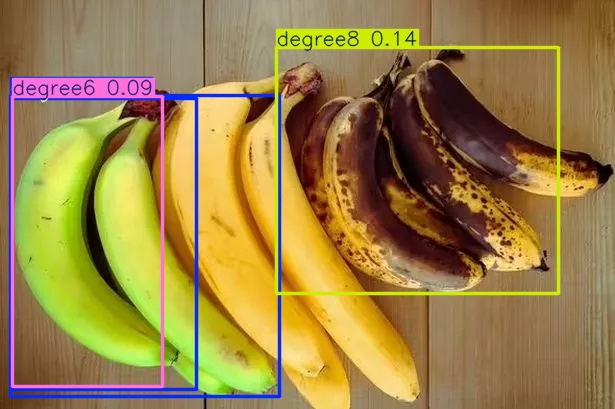

In [26]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('runs/detect/predict/0_bananas.jpg')

In [30]:
# Print the labels for a test image
with open('runs/detect/predict/labels/0_bananas.txt', 'r') as f:
    print(f.read())

7 0.679262 0.417538 0.458058 0.600943 0.137408
5 0.142997 0.590544 0.243811 0.70698 0.0861879
0 0.169897 0.596481 0.298347 0.711064 0.0818071
0 0.236376 0.601453 0.437133 0.736662 0.0594887

